In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

In [2]:
# Read in the residuals data
rays = "/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/runs/RAYS_run/"
SH55 = np.load(os.path.join(rays, "resid_dict_SH55.npy"), allow_pickle=True)[()]
BASE = np.load(os.path.join(rays, "resid_dict_BASE.npy"), allow_pickle=True)[()]
TL55 = np.load(os.path.join(rays, "resid_dict_TL55.npy"), allow_pickle=True)[()]
TL55_closest_head = np.load(os.path.join(rays, "resid_dict_TL55_closest_head.npy"), allow_pickle=True)[()]

resid_SH55 = SH55['resid']
resid_BASE = BASE['resid']
resid_TL55 = TL55['resid']
resid_TL55_closest_head = TL55_closest_head['resid']

In [3]:
resid_SH55[0].shape, resid_BASE[0].shape, resid_TL55[0].shape, resid_TL55_closest_head[0].shape

(torch.Size([400, 4]),
 torch.Size([400, 44]),
 torch.Size([400, 4]),
 torch.Size([400, 4]))

In [4]:
# calculate the L2 residuals at each iteration
L2_SH55 = np.array([np.square(vec).mean() for vec in resid_SH55])*4
L2_BASE = np.array([np.square(vec).mean() for vec in resid_BASE])*4
L2_TL55 = np.array([np.square(vec).mean() for vec in resid_TL55])*4
L2_TL55_closest_head = np.array([np.square(vec).mean() for vec in resid_TL55_closest_head])*4

In [5]:
np.min(L2_SH55), np.min(L2_BASE), np.min(L2_TL55), np.min(L2_TL55_closest_head)

(4.9294867e-06, 3.3991782e-05, 4.9831074e-06, 3.2080673e-06)

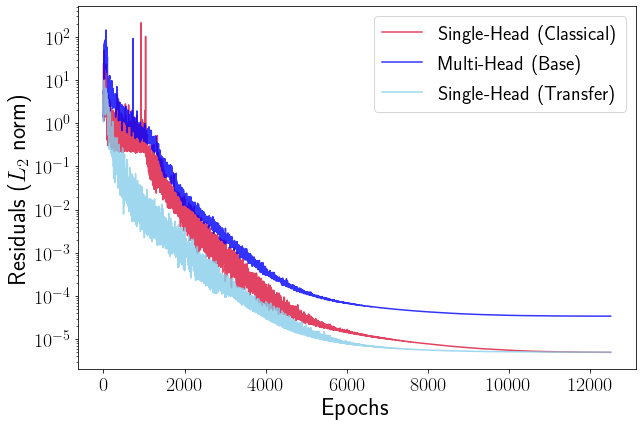

In [17]:
plt.rc('axes', titlesize=24, labelsize=24)
plt.rc('legend', fontsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams['text.usetex'] = True

colors = ['crimson', 'blue', 'skyblue']
n = 12500
fig, ax = plt.subplots(figsize=(10,6.67))
ax.plot(range(n), L2_SH55, label="Single-Head (Classical)", color=colors[0], alpha=0.8)
ax.plot(range(n), L2_BASE, label="Multi-Head (Base)", color=colors[1], alpha=0.8)
ax.plot(range(n), L2_TL55, label="Single-Head (Transfer)", color=colors[2], alpha=0.8)
ax.set_xlabel('Epochs')
ax.set_ylabel('Residuals ($L_2$ norm)')
ax.set_yscale('log')
ax.legend()
# plt.show()
plt.savefig('deqgan_classical_base_transfer.png', bbox_inches='tight', dpi=300)